In [69]:
from tracemalloc import stop
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import sys
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
sys.path.insert(1, "D:/AppProgPython/appprog/Lab4")
from df_functions import make_dataframe
from preprocess import preprocess_text

In [70]:
def change_label(data:pd.DataFrame, rate: int) -> pd.DataFrame:
    data.dropna(inplace=True)
    labels = lambda x: 1 if x == rate else 0
    data['label'] = data['Рейтинг'].apply(labels)
    return data

In [71]:
def load_data(file_path: str) -> pd.DataFrame:
    data = make_dataframe(file_path)
    data = preprocess_text(data)
    return data

In [72]:
def vectorizer(df: pd.DataFrame):
    cv = CountVectorizer(max_features=1000, stop_words=stopwords.words('russian'))
    sparse_matrix = cv.fit_transform(df["Текст отзыва"]).toarray()
    return sparse_matrix

In [73]:
def split_data(all_data, df:pd.DataFrame):
    text = np.array(df["label"])
    x_train, x_test, y_train, y_test = train_test_split(all_data, text)
    return x_train, x_test, y_train, y_test


In [74]:
df = load_data('D:/AppProgPython/appprog/csv/final.csv')


In [82]:
changed = change_label(df, 5)
vec = vectorizer(changed)
df.dropna(inplace =True)
df

,Абсолютный путь,Рейтинг,Текст отзыва,Количество слов,label
0,D:\AppProgPython\appprog\dataset\4\0000.txt,4,01 ноябрь решать пополнять свой счет банкомат ...,163,0
1,D:\AppProgPython\appprog\dataset\4\0001.txt,4,здраствовать 26.05 2023 заказывать дебетовый к...,179,0
2,D:\AppProgPython\appprog\dataset\4\0002.txt,4,добрый знак являться дружелюбный тон специалис...,130,0
3,D:\AppProgPython\appprog\dataset\4\0003.txt,4,выходить работа приходиться оформлять карта ал...,274,0
4,D:\AppProgPython\appprog\dataset\4\0004.txt,4,10 сентябрь приложение альфа банка совершать п...,199,0
...,...,...,...,...,...
995,D:\AppProgPython\appprog\dataset\5\0495.txt,5,30 сентябрь решать становиться клиент альфа-ба...,74,1
996,D:\AppProgPython\appprog\dataset\5\0496.txt,5,1 октябрь обращаться контактный центр альфа ба...,69,1
997,D:\AppProgPython\appprog\dataset\5\0497.txt,5,добрый день пользователь дебетовый карта альфа...,228,1
998,D:\AppProgPython\appprog\dataset\5\0498.txt,5,добрый день приходить уведомление мобильный пр...,194,1


In [84]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(1000, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
x_train, x_tmp, y_train, y_tmp = split_data(vec, changed)
x_test, x_valid, y_test, y_valid = train_test_split(x_tmp, y_tmp, test_size=0.5, random_state=42)

In [85]:
model = LogisticRegression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01)
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()
x_valid = Variable(torch.from_numpy(x_valid)).float()
y_valid = Variable(torch.from_numpy(y_valid)).long()

In [86]:
train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)
test_dataset = TensorDataset(x_test, y_test)

In [87]:
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
epochs = 40
loss_values = []
models = []

Epoch 1/40, Training Loss: 0.7201, Training Accuracy: 0.5040, Validation Loss: 0.7206, Validation Accuracy: 0.4960
Epoch 2/40, Training Loss: 0.7091, Training Accuracy: 0.5040, Validation Loss: 0.7145, Validation Accuracy: 0.4960
Epoch 3/40, Training Loss: 0.7015, Training Accuracy: 0.5040, Validation Loss: 0.7068, Validation Accuracy: 0.4960
Epoch 4/40, Training Loss: 0.6914, Training Accuracy: 0.5053, Validation Loss: 0.7011, Validation Accuracy: 0.4960
Epoch 5/40, Training Loss: 0.6775, Training Accuracy: 0.5080, Validation Loss: 0.6913, Validation Accuracy: 0.5040
Epoch 6/40, Training Loss: 0.6624, Training Accuracy: 0.5187, Validation Loss: 0.6808, Validation Accuracy: 0.5120
Epoch 7/40, Training Loss: 0.6459, Training Accuracy: 0.5613, Validation Loss: 0.6693, Validation Accuracy: 0.5200
Epoch 8/40, Training Loss: 0.6263, Training Accuracy: 0.6173, Validation Loss: 0.6555, Validation Accuracy: 0.5840
Epoch 9/40, Training Loss: 0.6019, Training Accuracy: 0.7000, Validation Loss: 0

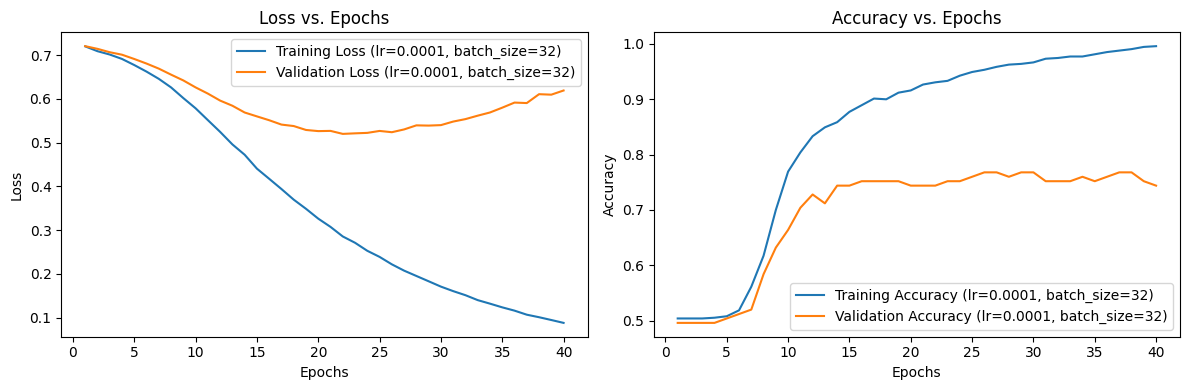

Epoch 1/40, Training Loss: 0.0844, Training Accuracy: 0.9960, Validation Loss: 0.6272, Validation Accuracy: 0.7680
Epoch 2/40, Training Loss: 0.0788, Training Accuracy: 0.9960, Validation Loss: 0.6373, Validation Accuracy: 0.7440
Epoch 3/40, Training Loss: 0.0741, Training Accuracy: 0.9960, Validation Loss: 0.6475, Validation Accuracy: 0.7600
Epoch 4/40, Training Loss: 0.0701, Training Accuracy: 0.9960, Validation Loss: 0.6608, Validation Accuracy: 0.7440
Epoch 5/40, Training Loss: 0.0662, Training Accuracy: 0.9960, Validation Loss: 0.6671, Validation Accuracy: 0.7440
Epoch 6/40, Training Loss: 0.0628, Training Accuracy: 0.9960, Validation Loss: 0.6805, Validation Accuracy: 0.7440
Epoch 7/40, Training Loss: 0.0593, Training Accuracy: 0.9960, Validation Loss: 0.6870, Validation Accuracy: 0.7360
Epoch 8/40, Training Loss: 0.0557, Training Accuracy: 0.9960, Validation Loss: 0.6991, Validation Accuracy: 0.7360
Epoch 9/40, Training Loss: 0.0528, Training Accuracy: 0.9960, Validation Loss: 0

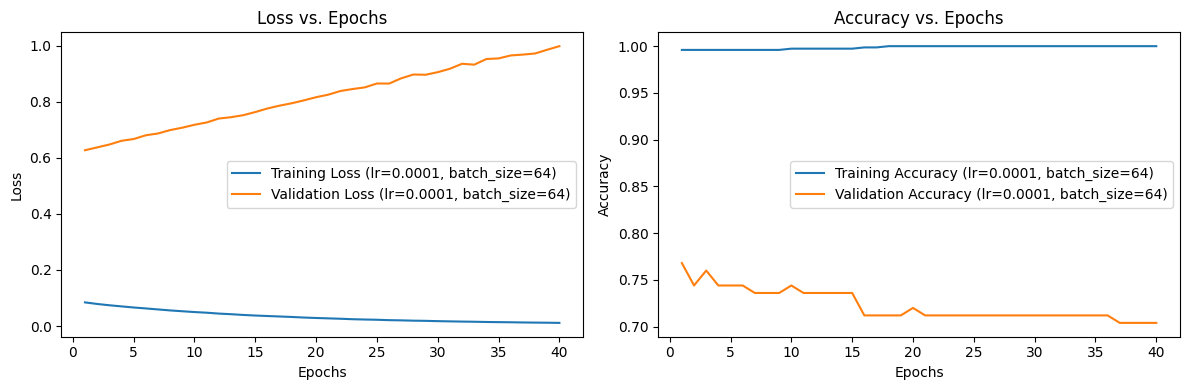

Epoch 1/40, Training Loss: 0.0111, Training Accuracy: 1.0000, Validation Loss: 1.0082, Validation Accuracy: 0.7040
Epoch 2/40, Training Loss: 0.0103, Training Accuracy: 1.0000, Validation Loss: 1.0175, Validation Accuracy: 0.7040
Epoch 3/40, Training Loss: 0.0096, Training Accuracy: 1.0000, Validation Loss: 1.0279, Validation Accuracy: 0.7040
Epoch 4/40, Training Loss: 0.0091, Training Accuracy: 1.0000, Validation Loss: 1.0417, Validation Accuracy: 0.7040
Epoch 5/40, Training Loss: 0.0086, Training Accuracy: 1.0000, Validation Loss: 1.0528, Validation Accuracy: 0.7040
Epoch 6/40, Training Loss: 0.0082, Training Accuracy: 1.0000, Validation Loss: 1.0660, Validation Accuracy: 0.7040
Epoch 7/40, Training Loss: 0.0077, Training Accuracy: 1.0000, Validation Loss: 1.0759, Validation Accuracy: 0.7040
Epoch 8/40, Training Loss: 0.0073, Training Accuracy: 1.0000, Validation Loss: 1.0883, Validation Accuracy: 0.7040
Epoch 9/40, Training Loss: 0.0069, Training Accuracy: 1.0000, Validation Loss: 1

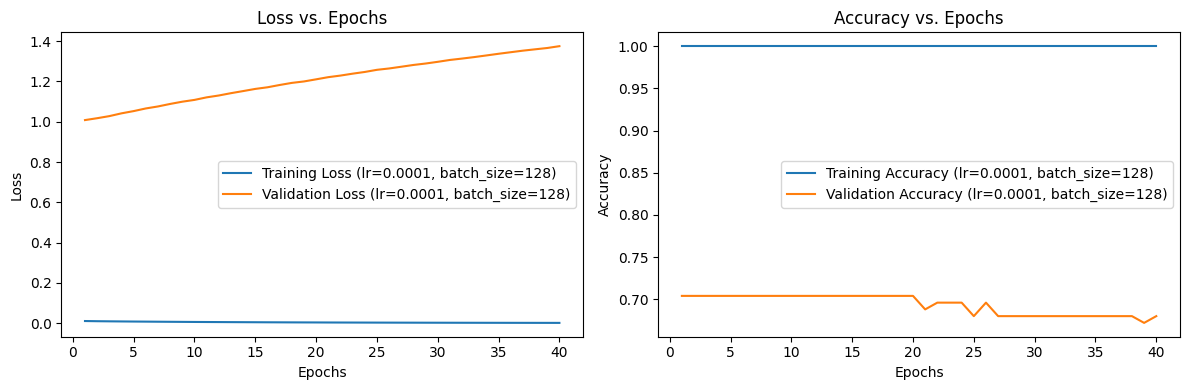

Epoch 1/40, Training Loss: 0.0030, Training Accuracy: 1.0000, Validation Loss: 1.5846, Validation Accuracy: 0.6960
Epoch 2/40, Training Loss: 0.0014, Training Accuracy: 1.0000, Validation Loss: 1.8411, Validation Accuracy: 0.6720
Epoch 3/40, Training Loss: 0.0007, Training Accuracy: 1.0000, Validation Loss: 1.9975, Validation Accuracy: 0.6640
Epoch 4/40, Training Loss: 0.0003, Training Accuracy: 1.0000, Validation Loss: 2.0048, Validation Accuracy: 0.6720
Epoch 5/40, Training Loss: 0.0002, Training Accuracy: 1.0000, Validation Loss: 2.0987, Validation Accuracy: 0.6720
Epoch 6/40, Training Loss: 0.0001, Training Accuracy: 1.0000, Validation Loss: 2.1943, Validation Accuracy: 0.6720
Epoch 7/40, Training Loss: 0.0001, Training Accuracy: 1.0000, Validation Loss: 2.2041, Validation Accuracy: 0.6720
Epoch 8/40, Training Loss: 0.0001, Training Accuracy: 1.0000, Validation Loss: 2.2223, Validation Accuracy: 0.6720
Epoch 9/40, Training Loss: 0.0001, Training Accuracy: 1.0000, Validation Loss: 2

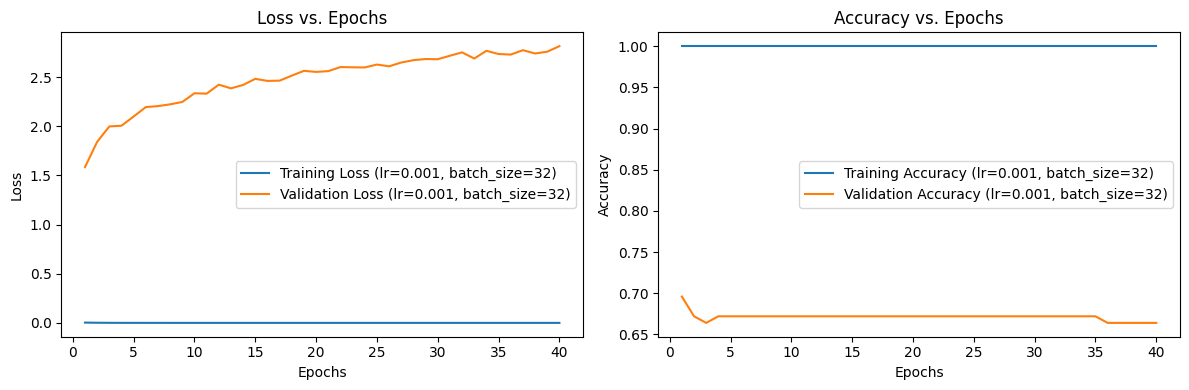

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.0536, Validation Accuracy: 0.6640
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.3655, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.5404, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.6116, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.6579, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.6809, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.7334, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3.7771, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 3

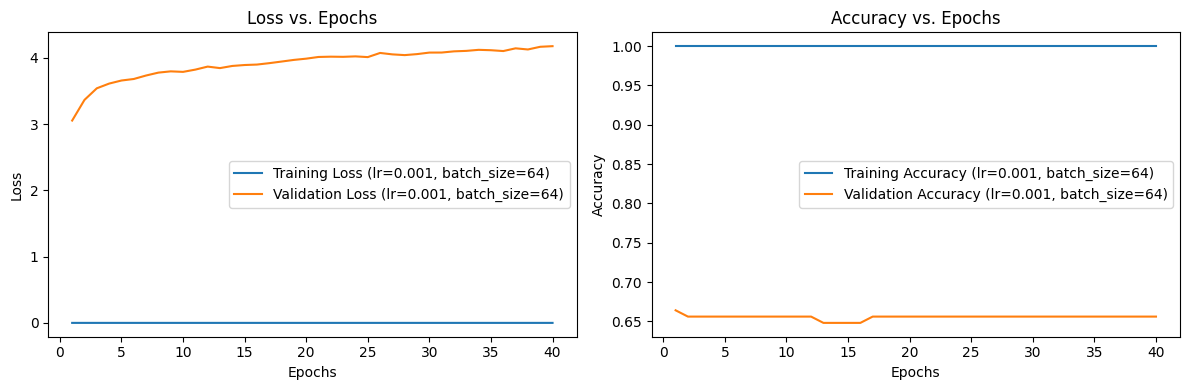

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.2867, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.3728, Validation Accuracy: 0.6480
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.4184, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.4692, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.5183, Validation Accuracy: 0.6480
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.5558, Validation Accuracy: 0.6480
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.5732, Validation Accuracy: 0.6480
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4.5932, Validation Accuracy: 0.6480
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 4

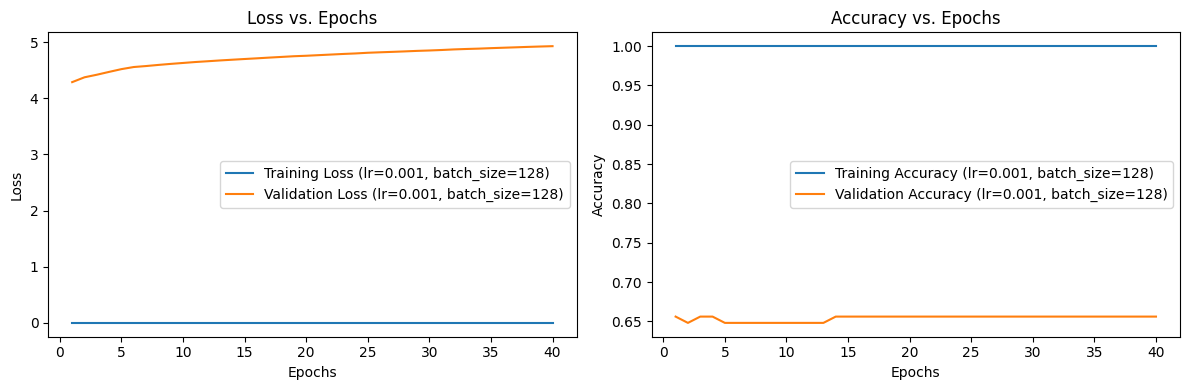

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.3131, Validation Accuracy: 0.6480
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.4883, Validation Accuracy: 0.6480
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.5028, Validation Accuracy: 0.6480
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.6153, Validation Accuracy: 0.6480
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.6675, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.6578, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.7594, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5.8875, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 5

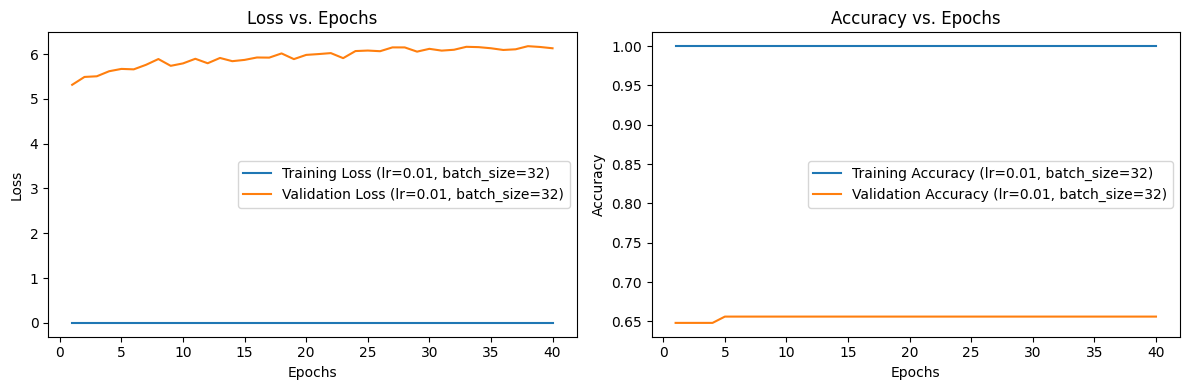

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.1981, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.2072, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.1692, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.1281, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.2490, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.2044, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.2095, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.2218, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6

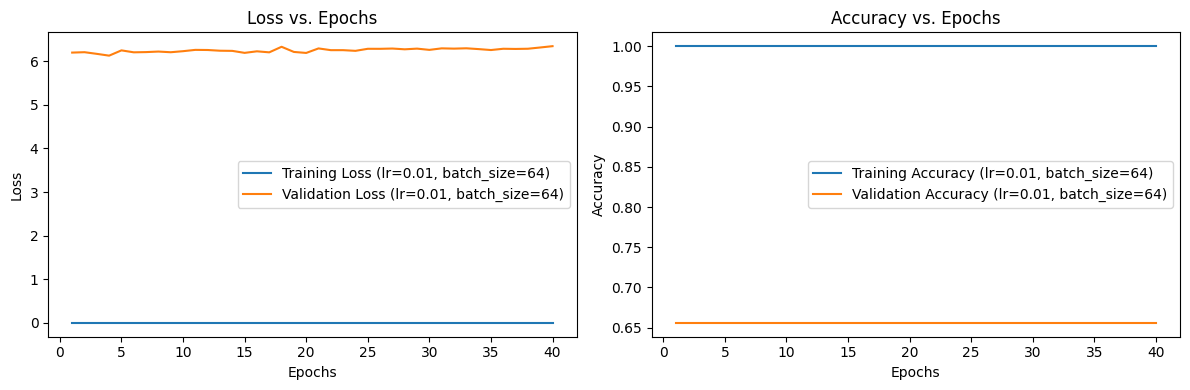

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.2979, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.2991, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.3004, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.3016, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.3028, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.3039, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.3049, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6.3063, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 6

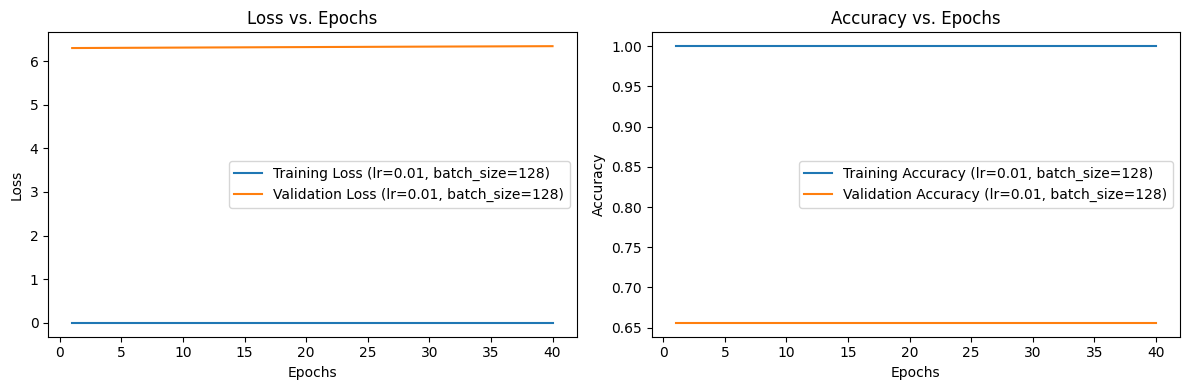

Test Accuracy: 0.7120


In [88]:
for lr in learning_rates:
    for batch_size in batch_sizes:
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Training loop
        train_losses = []
        valid_losses = []
        train_accuracy = []
        valid_accuracy = []

        for epoch in range(epochs):
            model.train()

            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            train_losses.append(running_loss / len(train_loader))
            train_accuracy.append(correct_train / total_train)

            # Validation
            model.eval()

            running_loss = 0.0
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for inputs, labels in valid_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    running_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    total_valid += labels.size(0)
                    correct_valid += (predicted == labels).sum().item()

                valid_losses.append(running_loss / len(valid_loader))
                valid_accuracy.append(correct_valid / total_valid)

                print(f'Epoch {epoch + 1}/{epochs}, '
                      f'Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracy[-1]:.4f}, '
                      f'Validation Loss: {valid_losses[-1]:.4f}, Validation Accuracy: {valid_accuracy[-1]:.4f}')
                models.append(model)

        # Visualization
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), train_losses, label=f'Training Loss (lr={lr}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_losses, label=f'Validation Loss (lr={lr}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epochs')

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), train_accuracy, label=f'Training Accuracy (lr={lr}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_accuracy, label=f'Validation Accuracy (lr={lr}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epochs')

        plt.tight_layout()
        plt.show()

# Evaluate model on the test set
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.4f}')
